#**Agrupamento ou Clusterização**

Cria grupos a partir de atributos(caracteristicas) das instâncias

**K-means**

Divide o conjunto de dados em K grupos distintos com base em suas características ou similaridades.

In [1]:
import pandas as pd
from sklearn import datasets
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
#valores unicos na coluna class
unicos, quantidade = np.unique(iris.target, return_counts =True)
unicos

array([0, 1, 2])

In [4]:
#registros por classe
quantidade

array([50, 50, 50])

In [5]:
#agrupamento  utilizando 3 clusters
cluster = KMeans(n_clusters = 3)
cluster.fit(iris.data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [6]:
#O algoritmo K-means começa selecionando K pontos iniciais, chamados de centróides, que representam o centro dos clusters. 
#Em seguida, cada ponto de dados é associado ao centróide mais próximo, criando assim K clusters
#visualizando as três centroides
centroides = cluster.cluster_centers_
centroides

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [7]:
#visualização dos grupos que cada registro foi associado
previsoes = cluster.labels_
previsoes

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [8]:
#contagem dos registros por classe
unicos2, quantidade2 = np.unique(previsoes, return_counts = True)
print(unicos2)
print(quantidade2)

[0 1 2]
[62 50 38]


In [9]:
#gerando matriz de contingência para comparar os grupos com a base de dados
resultados = confusion_matrix(iris.target, previsoes)
resultados


array([[ 0, 50,  0],
       [48,  0,  2],
       [14,  0, 36]])

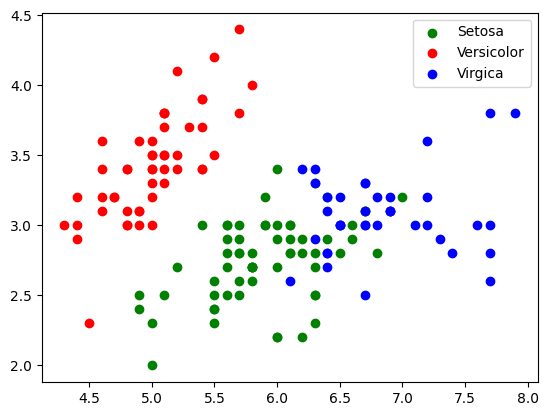

In [10]:
#geração do gráfico com os clusters gerado, considerando (0, 1, 2)
#usamos somente as colunas 0 e 1 da base de dados original para termos 2 dimensões
plt.scatter(iris.data[previsoes == 0, 0], iris.data[previsoes == 0, 1],
            c = 'green', label ='Setosa' ) 
plt.scatter(iris.data[previsoes == 1, 0], iris.data[previsoes == 1, 1],
            c = 'red', label ='Versicolor' )
plt.scatter(iris.data[previsoes == 2, 0], iris.data[previsoes == 2, 1],
            c = 'blue', label ='Virgica' )  
plt.legend()

**C-Means** ou **Fuzzy C-Means**

O C-means é semelhante ao K-means, mas em vez de atribuir cada ponto de dados a um único cluster, ele atribui graus de pertencimento a cada cluster. Isso significa que cada ponto de dados pode pertencer a mais de um cluster simultaneamente, com diferentes graus de pertencimento.

In [11]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894073 sha256=fa5aa2f37ff0312eb107ceb43a4ed9b5bcae9ca8b3d83d52965380eb05457e6a
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [12]:
import skfuzzy

In [13]:
#definindo três clusters( c = 3) e passando a matriz transposta(iris.data.T), demais parâmetros são obrigatórios e são default indicados na documentação
r = skfuzzy.cmeans(data = iris.data.T, c = 3, m = 2, error = 0.005, maxiter = 1000, init = None)

In [14]:
#obtendo a porcentagem de um registro pertencer a um cluster, que está na posição 1 da matriz
previsoes_porcentagem = r[1]

In [15]:
#visualização da probabilidade de um registro pertencer a cada um dos cluster (o somatório é 1.0 que indica 100%)
for x in range(150):
  print(previsoes_porcentagem[0][x], previsoes_porcentagem[1][x], previsoes_porcentagem[2][x])

0.0023044378179094705 0.9966236312784161 0.0010719309036744127
0.01665921830312519 0.9758396028895682 0.007501178807306735
0.01376584060181882 0.9798174927422232 0.00641666665595807
0.02247792440022627 0.9674103053124212 0.010111770287352533
0.0037620588826463445 0.9944700476683199 0.0017678934490337212
0.04482650976119014 0.9345464323530914 0.02062705788571843
0.014010376860514056 0.9794829099376243 0.006506713201861783
0.0003117077422711431 0.999547027331748 0.0001412649259806495
0.04774241830287087 0.9303471459810801 0.021910435716048858
0.011942790475906935 0.9827131966117602 0.005344012912332793
0.02176568217364265 0.9680302409693282 0.010204076857029143
0.005435372273162478 0.9921323167732489 0.002432310953588754
0.02019371506638389 0.9706254755019509 0.009180809431665252
0.051816171405508406 0.9229402524899003 0.025243576104591246
0.07263171800091191 0.8897270384757625 0.03764124352332567
0.1043797638534265 0.841299934704699 0.05432030144187461
0.03559148216071485 0.946908211683

In [16]:
#geração da matriz de contigência para comparação com as classes originais da base de dados
previsoes = previsoes_porcentagem.argmax(axis=0)
resultados = confusion_matrix(iris.target, previsoes)
resultados

array([[ 0, 50,  0],
       [47,  0,  3],
       [13,  0, 37]])

In [17]:
#contagem dos registros por classe
unicos2, quantidade2 = np.unique(previsoes, return_counts = True)
print(unicos2)
print(quantidade2)

[0 1 2]
[60 50 40]


**K-Medoids**

conhecido como Partitioning Around Medoids (PAM), é baseado em objetos selecionados - os medoids.

 K-Medoids usa uma **técnica de seleção** de medoids baseada em algoritmos genéticos para **encontrar o conjunto de medoids que melhor representa o conjunto de dados**.




In [18]:
pip install pyclustering


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 19.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395106 sha256=406ef8b535b41e82a25573c98e19e01446e10faf0aa2404a1b2cf6c3c1eaab10
  Stored in directory: /root/.cache/pip/wheels/b5/42/97/11eee99f5c1e4fdfc170f0a54f9c9eb195df66edb4cf69f449
Successfully built pyclustering


In [19]:
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.cluster import cluster_visualizer

In [20]:
#Configurando os parâmetros k-medoids, utilizando somente as duas primeiras colunas da base de dados ´por causa da visualização apenas
#3, 12 e 20 são indices aleatórios de registros d a base de dados(inicialização)
cluster = kmedoids(iris.data[: , 0:2], [3,12,20])
#visualização dos pontos escolhidos
cluster.get_medoids()

[3, 12, 20]

In [21]:
#aplicação do algoritmo para agrupamento
cluster.process() 
previsoes = cluster.get_clusters() #previsores - gera 3 lista com os indices de registros do cluster
medoides = cluster.get_medoids() #3, 12, 20


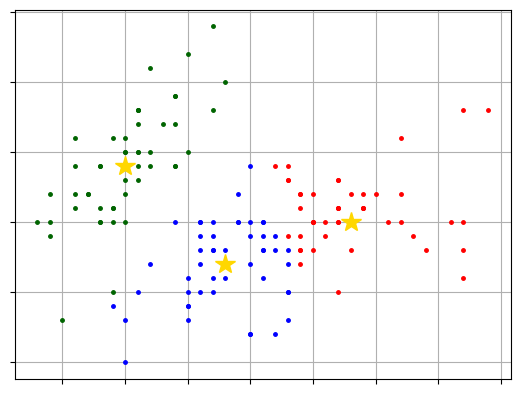

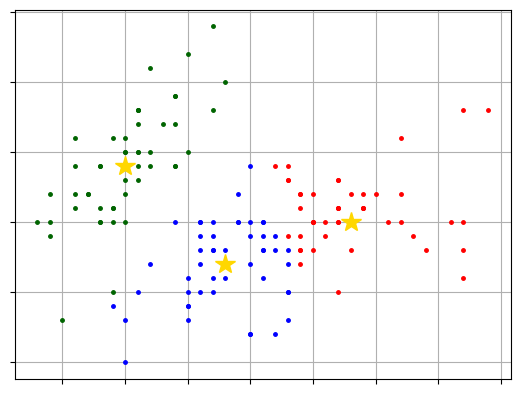

In [22]:
#visualização do agrupamento
v = cluster_visualizer()
v.append_clusters(previsoes, iris.data[:, 0:2])
v.append_cluster(medoides, data = iris.data[:, 0:2], marker = "*", markersize = 15)
v.show()


In [23]:
#Criar duas listas, uma com os grupos reais da base de dados e outra com os valores dos grupos, utilizada par visualização da matriz de contingência
lista_previsoes = []
lista_real = []
for i in range(len(previsoes)):
  for j in range(len(previsoes[i])):
    lista_previsoes.append(i)
    lista_real.append(iris.target[previsoes[i][j]])

In [24]:
#matriz de contingência
lista_previsoes = np.asarray(lista_previsoes)
lista_real = np.asarray(lista_real)
resultados = confusion_matrix(lista_real, lista_previsoes)
resultados

array([[ 0,  0, 50],
       [12, 38,  0],
       [35, 14,  1]])